In [43]:
import konlpy

In [44]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import re
import tensorflow as tf
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 데이터 확인

In [45]:
import csv
f = open('r1_file.csv','r', encoding = 'UTF-8-sig')
rdr = csv.reader(f)
for line in rdr:
    print(line)
f.close()

['0', '말투 깬다', '1']
['1', '요즘 연앤들 싫은소린 아에 차단하고 듣기좋은소리만 들으려하는듯. 조금만 비판해도 악플러 법적대응이라니 돈써서 본인들이 위라는행동 참 ㅋ 오래가겠다', '1']
['2', '저 짧은 몇 마디에서 인성이 보이넴 ..', '1']
['3', '개념없어 원래도 비호감 이었지만 하는 행동이나 말투 밉상 그자체ㅋㅋㅋㅋㅋ', '1']
['4', '정신분열 잼 ㅋㅋㅋ', '1']
['5', '실력에비해 오래갔다', '1']
['6', '거만이 하늘을 찌르네. 뭔짓을 하든 묻지도 따지지도 말고 찬양만 하고 돈이나 바쳐라 이건가?', '1']
['7', '점점... 왜저러냐 리더라는게 맨날 표정관리 못하고 기분에 따라 행동하고말하는거 진짜 별로다', '1']
['8', '말하는거 저급해...', '1']
['9', '말투가 왜저래ㅋㅋ', '1']
['10', '아무리 그래도 그렇지 말투가 저게 뭐냐;', '1']
['11', '왜저래 비꼰데?? 힘들면 그냥 조용히 탈퇴하세요~ 요즘 보면 얼굴도 어둡고 기분대로 행동하고 표정 다 드러내더만 이제 내리막길 ..다들 얼굴에 생기가 없고 초심도 잃은거 같고 ..배부르지?? 그만하고 쉬어라 다들 ..팬 많지? 금방 썰물처럼 다 휩쓸려간다 ~너희 아무것도 아니다~ 배부른 소리하고 자빠졌네 ~비호감이네 진짜', '1']
['12', '아무리봐도 잘못 뽑은 것 같다', '1']
['13', '인기있을때 높은곳에 있을 때 말을 좀 조심할 필요가 있을 거 같네요 표현이 참;;;', '1']
['14', '인기도 좋고 다 좋은데 말투가 왜 그래요 어린 팬들도 많은 사람이', '1']
['15', '진짜 예민하네;', '1']
['16', '와...좀 깨긴 깬다 스트레스여서 그럴 수도 있는데 그래도 라이브 동영상에서 저런 말을 했다는게....당신이 그 자리에 앉아있는 것도 그런 관심 때문인 것을....ㅉㅉ', '1']
['17', '윽..진짜 말투 이런다고???', '1']
['18', '말 더럽게 싸

['41', '하다하다 왠 듣보잡이 나와서..', '1']
['42', '더럽고 추악하다', '1']
['43', '왜 사냐??사는 이유가 없을거같은데', '1']
['44', '너도 그냥 자살해~~~~~자살 어때?', '1']
['45', '점점 정신이 이상해지는것 같다니 ㅋㅋㅋ현웃터졌네ㅋㅋㅋㅋ 원래부터 정신이 좀 이상했잖아 ㅋㅋㅋㅋ', '1']
['46', '한심ㅡㅡㅉㅉ 우리나라 왜이러니', '1']
['47', '꼴갑을 떤다 ㅎㅎ 신종 관종이냐??', '1']
['48', '정신과  약처방받아 먹어라~나을수있는 병이다', '1']
['49', '조용히 지내라. 꼴보기 싫다', '1']
['50', '인생 참 요란하게도 산다ㅉㅉ ', '1']
['51', '얘네는 그냥 기사화해주지 마요;;  진심 정신상태 이상', '1']
['52', '마약해서 맛이간듯', '1']
['53', 'ㅈㄹ도 풍년이네', '1']
['54', '애미가 또라이여서 저런애가 나왔구나....', '1']
['55', 'ㅋㅋ  나는 저 서희 맘이 제일 웃겨  어머니 현실을 직시하세요 영화속 주인공 다정한어머니  코스프레 할 때가 아니에요!똥을 보고  괜잖아 괜잖아 된장이다 냄새안난다  ~~ 이러면 똥이 된장 됩니까???', '1']
['56', '드럽노 레즈충', '1']
['57', '엄마가 하루가 멀다하고 이상한 기사로 딸이름이 오르내리면 얼마나 가슴이 아프실까...이쁘게 키워주신 부모님 생각해서 똑바로 살자!!', '1']
['58', '동성커플에 이해 안되는 폭력까지 역겹다.', '1']
['59', '원래 댓글 잘 안쓰는데 별걸다 기사쓰네요... 관종위한 ㄱ사 그냥 별로임', '1']
['60', '아이들 정신건강에 안 좋은 기사네요.', '1']
['61', '개성 존중 개취 존중 자존감 높게  곱게곱게 자식들 잘 가르치면 좋겠지만 자식이 내 맘같지 않죠ㆍ   남의자식 뭐라 할 것도 없다지만  그래도  한서희 어머님 고등학교 교장쌤인지  교감쌤 이시라던데  교육 제대로 못 

['286', '내가 만일 애를 갖게 된다며 너처럼 키우고 싶어', '0']
['287', '부모님은 얼마나 행복하실까????', '0']
['288', '너희 부모님이 너무 부럽다', '0']
['289', '부러운 사람....항상 부러워요 뭐든 잘하네', '0']
['290', '애인으로 두고 싶은 ', '0']
['291', '너만  보여', '0']
['292', '말도 정말 성숙하게 배려있게 너무잘하네 이러니 안좋아할수가 있어 평생 응원할게', '0']
['293', '웃는모습보면 얼마나 진솔한 사람인가 알게됩니다. 진짜 너무너무 소중해요', '0']
['294', '요정같아요.', '0']
['295', '섹시큐티러블리 응원합니다', '0']
['296', '언제나 진심 너무 고마워~~', '0']
['297', '많은 연예인들 좋아했었지만 이런 사람 처음. ', '0']
['298', '너무 착하고 사랑스럽고 주변에 대한 배려심 크고 인내심도 강하고 세상 다정함.', '0']
['299', '지켜본지 이제 2년 되었는데 한결같이 겸손하고 올곧고 반듯함', '0']
['300', '팬은 아니지만 항상 응원하고 있습니다', '0']
['301', '언제나 힘내세요', '0']
['302', '진짜 사랑 듬뿍 받고 잘 자란 사랑둥이라니까ㅠㅠ', '0']
['303', '너 정말 된 아이구나', '0']
['304', '널 사랑해~', '0']
['305', '진심어린 말투가 너무 사랑스럽다.', '0']
['306', '눈빛이 선~해.', '0']
['307', '인성갑이에요', '0']
['308', '너를 더 사랑할수밖에 없어', '0']
['309', '항상 응원하고있어', '0']
['310', '방탄소년단지민 늘한결같아 이뻐', '0']
['311', '예술가이자 가장 따뜻한 사람이지 싶어요.', '0']
['312', '어리지만 항상 존경스럽다!!', '0']
['313', '선한 영향력', '0']
['314', '항상 감사합니다', '0'

['179', '너무 보고싶어', '0']
['180', '좋네요', '0']
['181', '왠지 퇴폐적인데 막상 그렇지 않은 다른 여자보다 너~~~', '0']
['182', '굿', '0']
['183', '건강미 뿜뿜  싱그럽다', '0']
['184', '음원도 하나 내줘야징~~', '0']
['185', '조녜..', '0']
['186', '이런걸 바로 무보정 있는 그대로 사진 이라고 하는거지~아따~참 이쁘네.  다음 생에  저렇게 태어나봤으면 ㅋㅋㅋㅋㅋ', '0']
['187', '여전히 이뿌구나', '0']
['188', '머리너무이쁘당', '0']
['189', '안예쁜날이 없음', '0']
['190', '아 이쁘다 ~ 정말', '0']
['191', '이쁘다.증말로', '0']
['192', '청순 섹시 그 자체', '0']
['193', '진짜 사람이 선하게 생기지 않았나요????', '0']
['194', '항상 선한 영향력을 모두에게 주어서 응원하고 있어요', '0']
['195', '응원합니다!! ', '0']
['196', '선함 그 자체', '0']
['197', '예쁘다ㅏㅏㅏㅏㅏㅏ', '0']
['198', '예쁘다 예뻐!!!!활동 많이 해서 자주 보고 싶어요!!!', '0']
['199', '존예', '0']
['200', '이쁘다', '0']
['201', '너무 예쁘다 진짜로', '0']
['202', '보고싶었다 ^^ 할말 많치만 얼굴보니 한마디만 생각난다ㅠ 사랑합니다', '0']
['203', '예쁘네요~~^^', '0']
['204', '얼굴 보니 넘넘넘 좋아요 나 언니 사랑하나봐요  어쩜 조아요 ㅠ', '0']
['205', '맛있는거 먹을때 보면 좋아요.', '0']
['206', '여신이다 ㅎㅎㅎ', '0']
['207', '국민첫사랑', '0']
['208', '요즘에 최고 잘나가는 내 사랑', '0']
['209', '항상 좋은 것만 먹고 잠 잘자길', '0']
['210', '긍정적인 마인드 항상 배워가요

['107', '이 관종은 대체...', '1']
['108', '홍가혜 이후로 역대급 관종이네ㅋㅋㅋㅋ 그냥 불쌍', '1']
['109', '관심 받는 게 인생의 목표인 듯 ㅋㅋㅋㅋㅋㅋㅋ 대단하다 진짜', '1']
['110', 'ㅋㅋ정신병자', '1']
['111', '뇌를 키워나가길.  개념과상식밖의  언행이 도가지나침. 부모님은 얼마나  가슴 저밀까.', '1']
['112', '낸시랭이 가니 또 다른 년이 오고.대한민국에는 정신병자가 넘쳐난다', '1']
['113', '그냥 정신병자인걸로', '1']
['114', '둘다 이상함  제정신 아닌것들 기사좀 쓰지마라  자꾸 써주니 이지롤들', '1']
['115', '아 어쩌라고 쟤 뭐 대단하다고 일거수 일투족 생중계야 그러니까 톱스타병 오지게 걸리잖아 저런 애가', '1']
['116', 'ㅉㅉ', '1']
['117', '홍상수 김민희 만큼 쓰레기 듀오', '1']
['118', '신발끈 묶어주는거 대체 어디서 배워서들 저 ㅈㄹ을 하는거냐. 역겹네', '1']
['119', '희대의 정신병자 일반인인데 연예인인척 오지는 쌉x년', '1']
['120', '더럽다', '1']
['121', '서로 빨았을듯..ㅋ', '1']
['122', '다음엔 뭐일지 기대되는 년은 첨이다ㅋㅋ', '1']
['123', '관종 노답', '1']
['124', '지롤도 가지가지다', '1']
['125', '돌았나 진짜...쇼윈도든 뭐든 난 저게 뭐라고 연예인도 멋도 아닌 일반인 사고뭉치 관종의 라방 보고있는 것들이 더 웃김', '1']
['126', '정신병자 sns좀 그만 기사화 합시다.', '1']
['127', '더러운것들 에이즈나 처걸려라', '1']
['128', '정신병자네 관종들', '1']
['129', '정신과입원치료가 시급함', '1']
['130', '이런 미친년도 사는데.. 힘들내자', '1']
['131', '관심종자군', '1']
['132', '얘 쫌 이상해..', '1']
['133', '

['705', '운동 많이 한다더니 진짜 멋있네요', '0']
['706', '자신을 가장 잘 아는 한혜진씨 멋지네요', '0']
['707', '진짜~말이안나오구 첨엔 놀라서..멋있다~~대단하단생각밖엔 안나오네...진심  멋있다', '0']
['708', '와 진짜 말이 안나온다', '0']
['709', '멋있당', '0']
['710', '멋지네', '0']
['711', '멋지다♡♡♡', '0']
['712', '진짜 대단하다 ', '0']
['713', '??????????????', '0']
['714', '진정한 박수를!!!!', '0']
['715', '멋있다.', '0']
['716', '프로답다 화이팅^^', '0']
['717', '너무 멋져요 대단해요.', '0']
['718', '너무 아름답고 자랑스럽고 존경합니다!', '0']
['719', '멋있다', '0']
['720', '존경스럽네요', '0']
['721', '부럽~', '0']
['722', '노력의 끝판왕에 박수 보냅니다! 짝짝짝!!!', '0']
['723', '너무 멋집니다..', '0']
['724', '멋있네요 자기관리 정말 잘하네요~!!', '0']
['725', '부럽습니다', '0']
['726', '정말 멋있다', '0']
['727', '역시 프로네요.넘 멋지', '0']
['728', '와우~~최고다!!!', '0']
['729', '첵오??????????????', '0']
['730', '앞으로도 멋진모습 기대할께요 화이팅!!', '0']
['731', '멋있다!', '0']
['732', '멋지다!! 소름이 끼칠 정도', '0']
['733', '멋지네-', '0']
['734', '대박 진짜 멋있다~', '0']
['735', '대단합니다 ????????????', '0']
['736', '인형이네요 대박멋집니다', '0']
['737', '넘 멋지다^^역시 프로야~~', '0']
['738', '천직인듯! 대박!', '0']
['739', '멋있다

In [46]:
dic = pd.read_csv('r1_file.csv',encoding = 'UTF-8-sig')
dic[:5]

,0,말투 깬다,1
0,1,요즘 연앤들 싫은소린 아에 차단하고 듣기좋은소리만 들으려하는듯. 조금만 비판해도 악...,1
1,2,저 짧은 몇 마디에서 인성이 보이넴 ..,1
2,3,개념없어 원래도 비호감 이었지만 하는 행동이나 말투 밉상 그자체ㅋㅋㅋㅋㅋ,1
3,4,정신분열 잼 ㅋㅋㅋ,1
4,5,실력에비해 오래갔다,1


In [47]:
dic.columns = ['0', 'comment', 'label']
dic[:5]

,0,comment,label
0,1,요즘 연앤들 싫은소린 아에 차단하고 듣기좋은소리만 들으려하는듯. 조금만 비판해도 악...,1
1,2,저 짧은 몇 마디에서 인성이 보이넴 ..,1
2,3,개념없어 원래도 비호감 이었지만 하는 행동이나 말투 밉상 그자체ㅋㅋㅋㅋㅋ,1
3,4,정신분열 잼 ㅋㅋㅋ,1
4,5,실력에비해 오래갔다,1


In [48]:
comment_data = dic[['comment','label']]
comment_data[:5]

,comment,label
0,요즘 연앤들 싫은소린 아에 차단하고 듣기좋은소리만 들으려하는듯. 조금만 비판해도 악...,1
1,저 짧은 몇 마디에서 인성이 보이넴 ..,1
2,개념없어 원래도 비호감 이었지만 하는 행동이나 말투 밉상 그자체ㅋㅋㅋㅋㅋ,1
3,정신분열 잼 ㅋㅋㅋ,1
4,실력에비해 오래갔다,1


In [49]:
print(len(comment_data)) # 댓글 개수 출력

9316


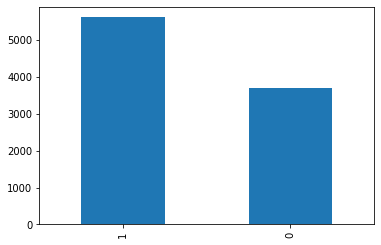

In [50]:
comment_data['label'].value_counts().plot(kind='bar') #data 분포 그래프를 통해서 확인하기

In [51]:
X_data = comment_data['comment']
y_data = comment_data['label']
print('comment 개수: {}'.format(len(X_data)))
print('rating개수: {}'.format(len(y_data)))

comment 개수: 9316
rating개수: 9316


# 불용어 제거 및 토큰화

In [52]:
normalized_text = []
for string in X_data.tolist():
    try:
        tokens = re.sub(r"[^ㄱ-ㅎㅏ-ㅣ가-힣]+", " ", string.lower())
    except Exception as e:
        print(string)
        break
    normalized_text.append(tokens)
print(normalized_text[:5])

['요즘 연앤들 싫은소린 아에 차단하고 듣기좋은소리만 들으려하는듯 조금만 비판해도 악플러 법적대응이라니 돈써서 본인들이 위라는행동 참 ㅋ 오래가겠다', '저 짧은 몇 마디에서 인성이 보이넴 ', '개념없어 원래도 비호감 이었지만 하는 행동이나 말투 밉상 그자체ㅋㅋㅋㅋㅋ', '정신분열 잼 ㅋㅋㅋ', '실력에비해 오래갔다']


In [108]:
sentence_join = ','.join(normalized_text)
print(sentence_join)

요즘 연앤들 싫은소린 아에 차단하고 듣기좋은소리만 들으려하는듯 조금만 비판해도 악플러 법적대응이라니 돈써서 본인들이 위라는행동 참 ㅋ 오래가겠다,저 짧은 몇 마디에서 인성이 보이넴 ,개념없어 원래도 비호감 이었지만 하는 행동이나 말투 밉상 그자체ㅋㅋㅋㅋㅋ,정신분열 잼 ㅋㅋㅋ,실력에비해 오래갔다,거만이 하늘을 찌르네 뭔짓을 하든 묻지도 따지지도 말고 찬양만 하고 돈이나 바쳐라 이건가 ,점점 왜저러냐 리더라는게 맨날 표정관리 못하고 기분에 따라 행동하고말하는거 진짜 별로다,말하는거 저급해 ,말투가 왜저래ㅋㅋ,아무리 그래도 그렇지 말투가 저게 뭐냐 ,왜저래 비꼰데 힘들면 그냥 조용히 탈퇴하세요 요즘 보면 얼굴도 어둡고 기분대로 행동하고 표정 다 드러내더만 이제 내리막길 다들 얼굴에 생기가 없고 초심도 잃은거 같고 배부르지 그만하고 쉬어라 다들 팬 많지 금방 썰물처럼 다 휩쓸려간다 너희 아무것도 아니다 배부른 소리하고 자빠졌네 비호감이네 진짜,아무리봐도 잘못 뽑은 것 같다,인기있을때 높은곳에 있을 때 말을 좀 조심할 필요가 있을 거 같네요 표현이 참 ,인기도 좋고 다 좋은데 말투가 왜 그래요 어린 팬들도 많은 사람이,진짜 예민하네 ,와 좀 깨긴 깬다 스트레스여서 그럴 수도 있는데 그래도 라이브 동영상에서 저런 말을 했다는게 당신이 그 자리에 앉아있는 것도 그런 관심 때문인 것을 ㅉㅉ,윽 진짜 말투 이런다고 ,말 더럽게 싸가지 없게 하네ㅋㅋㅋㅋㅋ 니 성격대로 피코짓 하지말고 이제 힘든척 울지마 이 가식덩어리야,멘탈이 상당히 불안정한듯 제발 말과 글을 자제하고 행동을 조심해주길 ,맨날 표정관리못하고 기분에따라 행동하고그리고 그만 우세요 ,말은 조심히 써야 된다고 본다 그런 말투라면 모든행동이 가식적으로 느껴질거 같다 ,어차피 이래저래 이미지 다 망가졌는데 열심히 쉴드 쳐라ㅋㅋㅋㅋㅋㅋ,인성 보소 ,요즘 얘네 무슨 특권의식이 이렇게 심한지 모르겠음 회사 인성관리 한다고 하지 않았나 ,깨진 건 너 얼굴이다,개돌았네,아 싼티나,언행이 참 가벼워보이네 ㅋㅋ 그렇게 안봤는데 벌레보

In [110]:
from konlpy.tag import Komoran
komoran = Komoran()

In [95]:
komoran_sentence = komoran.morphs(sentence_join)
print(komoran_sentence)

['요즘', '열', 'ㄴ', '앤드', 'ㄹ', '싫', '은', '소리', 'ㄴ', '아', '에', '차단', '하', '고', '듣', '기', '좋', '은', '소리', '만', '들', '으려', '하', '는', '듯', '조금', '만', '비판', '하', '아도', '악플러', '법적', '대응', '이', '라니', '돈', '쓰', '어서', '본인', '들', '이', '위', '이', '라는', '행동', '참', 'ㅋ', '오래가', '겠', '다', ',', '저', '짧', '은', '몇', '마디', '에서', '인성', '이', '보이넴', ',', '개념', '없어', '원래', '도', '비', '호감', '잇', '었', '지만', '하', '는', '행동', '이나', '말투', '밉상', '그자쳌ㅋㅋㅋㅋ,정신분열', '재', 'ㅁ', 'ㅋㅋㅋ,실력에비해', '오래', '가', '았', '다', ',', '거만', '이', '하늘', '을', '찌르', '네', '뭔', '짓', '을', '하든', '묻', '지', '도', '따지', '지', '도', '말', '고', '찬양', '만', '하', '고', '돈', '이나', '바치', '어라', '이건', '가', ',', '점점', '왜', '저러', '냐', '리더', '이', '라는', '게', '맨날', '표정', '관리', '못하', '고', '기분', '에', '따르', '아', '행동', '하', '고', '말', '하', '는', '거', '진짜', '별로', '다', ',', '말', '하', '는', '거', '저급', '하', '아', ',', '말투', '가', '왜저랰ㅋ,아무리', '그래도', '그렇', '지', '말투', '가', '저', '게', '뭐', '냐', ',', '왜', '저', '래', '비꼬', 'ㄴ데', '힘들', '면', '그냥', '조용히', '탈퇴', '하', '시', '어요', '요즘', '보', '면', '얼굴',

In [128]:
new = ['요즘 예쁘다','요즘 멋있다',',','요즘 착하다']

In [133]:
k = ','
list = []
while k in new:
    list.append(new)
   #list.append(new[i])
print(k)
print(list)

요즘 착하다
[['요즘 예쁘다', '요즘 멋있다', ',', '요즘 착하다'], ['요즘 예쁘다', '요즘 멋있다', ',', '요즘 착하다'], ['요즘 예쁘다', '요즘 멋있다', ',', '요즘 착하다'], ['요즘 예쁘다', '요즘 멋있다', ',', '요즘 착하다']]


In [ ]:
print(X_token[:3])

# 정수 인코딩 수행

In [ ]:
max_words = 35000
tokenizer = Tokenizer(num_words = max_words) # 상위 35,000개의 단어만 보존
tokenizer.fit_on_texts(X_token) 
X_token = tokenizer.texts_to_sequences(X_token)

In [ ]:
print(X_token[:3])

In [ ]:
word_to_index = tokenizer.word_index

In [ ]:
vocab_size = len(word_to_index)+1
print('단어 집합의 크기: {}'.format((vocab_size)))

# 전체 데이터 길이 분포 확인

In [ ]:
print('train 리뷰의 최대 길이 :',max(len(l) for l in X_token))
print('리뷰의 평균 길이 :',sum(map(len, X_token))/len(X_token))
plt.hist([len(s) for s in X_token], bins=100)
plt.xlabel('length of Data')
plt.ylabel('number of Data')
plt.show()

In [ ]:
max_len = 124
data = pad_sequences(X_token, maxlen=max_len)
print("data shape: ", data.shape)

In [ ]:
X_data = pad_sequences(X_token, maxlen=max_len)
y_data = np.array(y_data).reshape(-1, 1)

In [ ]:
print(type(X_data))
print(type(y_data))

In [ ]:
print(X_data[:3])
print(y_data[:3])

# 데이터 분리

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size= 0.3, random_state=1234)

In [ ]:
print(X_train[:3])
print(y_train[:3]) 

# 모델 만들기

In [ ]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential

In [ ]:
model = Sequential()
model.add(Embedding(max_words, 100))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split = 0.2)

In [ ]:
print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test, y_test)[1]))

# accuracy-epoch, loss-epoch 그래프 그리기

In [ ]:
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['acc'])
plt.plot(epochs, history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()